# D206 Data Cleaning
#### By: Orland Cole Malphrus
#### 5/2/2021

## PART I: Research Question
#### A:  Describe one question or decision that you will address using the data set you chose.
 Can we accurately predict which individual patients are likey to require redamission based on their patient profile? That is, can we create a model that will identify the likleyhood of readmission based on data collected during the initial visit? Furthermore to address this question, we must address the question of which individual data features correlate with the readmission rate.

### B: Describe the variables in the data set 

The data set contains 10,000 patient records from a hospital that hopes to assess the likelihood of patient readmission. The data set contains a column labeled “ReAdmis” which is the target variable in the analysis. The Readmission data point is a categorical variable that is boolean. The readmission data point reads “yes” if the patient was readmitted to the hospital within a month. 

The data set is also comprised of many other independent variables that must be considered. These variables will be assessed to determine potential predictors of our target variable. These variables fall into four main categories.

1. Patient medical condition: medical condition data points are primarily categorical and contain boolean “yes/no” or “0/1” values. For example, the data set contains a “BackPain” column where if the patient has back chronic back pain the column would contain a “yes” value and if the patient does not have chronic back pain the value would be “no”. high blood pressure, stroke, obesity, arthritis, diabetes, and a few others follow this same pattern. The “VitD_levels” column is an example of an exception to this pattern as this data column Mesures Vitamine D levels as a numerical value.
2. Patient Information: patient information columns are columns that contain information about the patient’s stay. This includes information such as the type of initial admission, treatments received, and the number of days hospitalized. The patient information contains categorical data exemplified by the type of initial admission which is broken down into three categories “emergency admission”, “elective admission”, “observation”. The patient information also contains numerical data such as the number of days hospitalized which contains a count of the number of days the patient stayed in the hospital.
3. patient demographic information: the patient demographic data includes items such as the geographic location, income level, age, and regional population. This data categorical data based such as the country of residence on the patients billing address as well as numerical data such as the income of the patient.
4. Survey Data: The survey data contains 8 questions about the perceived importance of certain aspects of the hospital experience. The data points are stored as numerical ratings on a scale of 1 to 8 with 1 being most important and being the least important.


## Part II: Data Cleaning Plan

### C: Explain the plan for cleaning the data by doing the following:

#### C1. The Approach that will be used to discover anomalies in the data:
1. The data will be imported from the CSV file and into a python pandas DataFrame.
2. The data labels will be identified and checked for alignment with the data dictionary provided by the hospital.
3. A new Index field will be created if one is not satasfoctoraly provided in the pre existing data set.
4. The data sets columns will be scanned to discover columns with missing values. These columns will be noted for further action when it comes to mitigating abnormalities. This will be done using pandas built in null and na checking.
5. Columns in the data frame that contain numerical values will be anylized using matplotlib’s box plot functionality. This will aim to identify columns with outliers that could potentially be anomalies. 
6. The 8 survey items in the data set will be anylized separately from the other numerical values. Since the data dictionary specifies the range of values allowed on the survey as numbers between one and 8 we can scan for anomalies with a pandas min and max functions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('./medical_raw_data.csv')
pd.set_option('display.max_columns', 55)

In [28]:
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,ID
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4,0
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3,1
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3,2
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5,3
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3,4


In [36]:
# df.drop("Unnamed: 0", axis=1)
df.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Overweight,Anxiety,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,ID
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,10000.000000,10000.000000,10000.000000,9018.000000,9016.000000,8944.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,5.012200,1.001400,0.398900,0.709137,0.322316,34.432082,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700,4999.50000
std,2886.89568,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,1.045734,1.008117,0.628505,0.454186,0.467389,26.287050,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312,2886.89568
min,1.00000,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,0.000000,0.000000,0.000000,0.000000,1.001981,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,2500.75000,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,4.000000,0.000000,0.000000,0.000000,0.000000,7.911709,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2499.75000
50%,5000.50000,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,5.000000,1.000000,0.000000,1.000000,0.000000,34.446941,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4999.50000
75%,7500.25000,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,6.000000,2.000000,1.000000,1.000000,1.000000,61.124654,7614.989701,15626.491032,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,7499.25000
max,10000.00000,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,7.000000,5.000000,1.000000,1.000000,71.981486,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,9999.00000


In [47]:
s1 = (df.isnull().sum() / 10000) * 100
s1

Unnamed: 0             0.00
CaseOrder              0.00
Customer_id            0.00
Interaction            0.00
UID                    0.00
City                   0.00
State                  0.00
County                 0.00
Zip                    0.00
Lat                    0.00
Lng                    0.00
Population             0.00
Area                   0.00
Timezone               0.00
Job                    0.00
Children              25.88
Age                   24.14
Education              0.00
Employment             0.00
Income                24.64
Marital                0.00
Gender                 0.00
ReAdmis                0.00
VitD_levels            0.00
Doc_visits             0.00
Full_meals_eaten       0.00
VitD_supp              0.00
Soft_drink            24.67
Initial_admin          0.00
HighBlood              0.00
Stroke                 0.00
Complication_risk      0.00
Overweight             9.82
Arthritis              0.00
Diabetes               0.00
Hyperlipidemia      

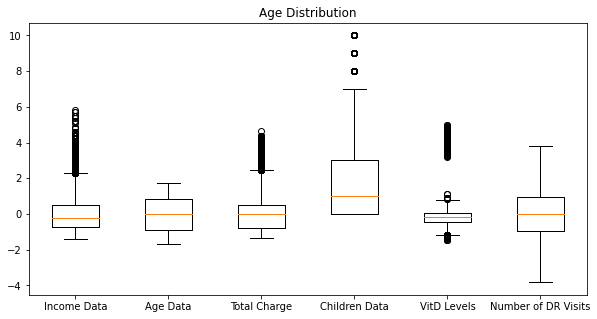

In [97]:
boolLI = df["Age"].isnull()
age_data = df.loc[~boolLI , "Age"]
boolLI = df["Income"].isnull()
income_data = df.loc[~boolLI , "Income"]
boolLI = df["TotalCharge"].isnull()
charge_data = df.loc[~boolLI , "TotalCharge"]
boolLI = df["Children"].isnull()
children_data = df.loc[~boolLI , "Children"]
boolLI = df["VitD_levels"].isnull()
vitd_data = df.loc[~boolLI , "VitD_levels"]
boolLI = df["Doc_visits"].isnull()
docvisit_data = df.loc[~boolLI , "Doc_visits"]


std_income_data = (income_data - income_data.mean()) /income_data.std()
std_age_data = (age_data - age_data.mean()) /age_data.std()
std_total_charge = (charge_data - charge_data.mean()) /charge_data.std()
std_children_data = (children_data - children_data.mean()) /children_data.std()
std_vitd_data = (vitd_data - vitd_data.mean()) /vitd_data.std()
std_docvisit_data = (docvisit_data - docvisit_data.mean()) /docvisit_data.std()

plt.figure(figsize=(10,5)) 
plt.title("Age Distribution")
plt.boxplot([
    std_income_data,
    std_age_data,
    std_total_charge,
    children_data,
    std_vitd_data,
    std_docvisit_data
]) 
plt.xticks([1,2,3,4,5, 6],[
    "Income Data",
    "Age Data",
    "Total Charge",
    "Children Data",
    "VitD Levels",
    "Number of DR Visits"
])
plt.show()

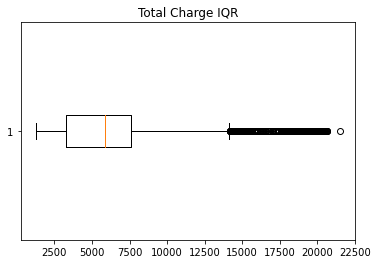

-1.3722986051235244

In [92]:
plt.boxplot(charge_data, vert = 0)
plt.title("Total Charge IQR")
plt.show()
min(stats.zscore(charge_data))

In [9]:
df.shape

(10000, 53)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [11]:
df["ID"] = pd.Series(range(0,10000))

In [12]:
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,ID
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4,0
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3,1
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3,2
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5,3
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3,4


In [13]:
df[["Anxiety", "Diabetes"]]

,Anxiety,Diabetes
0,1.0,Yes
1,NaN,No
2,NaN,Yes
3,NaN,No
4,0.0,No
...,...,...
9995,1.0,No
9996,0.0,Yes
9997,1.0,No
9998,0.0,No


In [14]:
df.loc[60:70, "Diabetes":"Anxiety"]

,Diabetes,Hyperlipidemia,BackPain,Anxiety
60,No,No,No,0.0
61,Yes,No,Yes,1.0
62,No,Yes,Yes,1.0
63,No,No,Yes,1.0
64,Yes,No,Yes,0.0
65,No,Yes,No,1.0
66,No,No,No,0.0
67,Yes,No,No,NaN
68,No,No,No,1.0
69,No,No,No,0.0


In [15]:
df.loc[:,"Initial_admin"].value_counts()

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

In [16]:
df.index


RangeIndex(start=0, stop=10000, step=1)

In [17]:
type(df.loc[1,"Anxiety"])

numpy.float64

In [18]:
anx = df["Anxiety"].isnull()

In [19]:
anx.value_counts()

False    9016
True      984
Name: Anxiety, dtype: int64

In [20]:
anx_set = df["Anxiety"]

In [21]:
anx_set = anx_set[anx]

In [22]:
anx_set

1      NaN
2      NaN
3      NaN
8      NaN
17     NaN
        ..
9945   NaN
9950   NaN
9956   NaN
9963   NaN
9980   NaN
Name: Anxiety, Length: 984, dtype: float64